<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: feature or value
### Hidden Layer:  unaccessable node in a NN
### Output Layer: Result after function applied, wieghts and bias
### Neuron: A node in a NN
### Weight: Arbitrary Value that scales the input layer value that is later changed as a result of back propigation or hand tuned.
### Activation Function: A function that decides on whether a node/nueron should be acitvated or not such as a sigmoid, linear, etc 
### Node Map: Schematic of the stream of information in a NN
### Perceptron: A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class.[1] It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. 

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

Information goes in as the input layer. It is then scaled by the weight and all terms of that node are added together as well as the bias. The activaion function then determines a value that corresponds to if successive nodes will be acivated.

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(812)

inputs = np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1],
    [1,1,0]
])

correct_outputs = [[1], [0], [1], [0]]

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

errors = []

weights = 2 * np.random.random((3,1)) - 1

for iteration in range(10000):

    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)

    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-13.8003305 ]
 [  2.30641668]
 [  6.62431292]]
Output after training
[[9.98673941e-01]
 [7.64197496e-04]
 [9.99867740e-01]
 [1.01935655e-05]]


[0 0]: -0.1134523216593486 -> 0
[0 1]: 0.705811536881602 -> 1
[1 0]: 0.6232015474410028 -> 1
[1 1]: 1.4424654059819533 -> 1


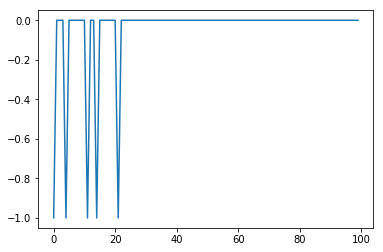

In [29]:
import random

unit_step = lambda x: 0 if x < 0 else 1

training_data = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 1),
]

w = np.random.rand(3)
errors = []
eta = 0.2
n = 100

for i in range(n):
    x, expected = choice(training_data)
    result = np.dot(w, x)
    error = expected - unit_step(result)
    errors.append(error)
    w += eta * error * x

for x, _ in training_data:
    result = np.dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))
plt.plot(errors);

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [65]:
import numpy as np
#AND gate predictor
class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

In [92]:
training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])

perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
print(perceptron.predict(inputs)) 
#=> 1

inputs = np.array([0, 1])
print(perceptron.predict(inputs)) 

1
0


In [69]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')

In [117]:
len(df)

768

In [115]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [101]:
del X

In [116]:
X = []
labels = np.array(df.Outcome)
for i in range(len(df)):
    x = df.Pregnancies[i]
    y = df.Glucose[i]
    z = df.BloodPressure[i]
    p = df.SkinThickness[i]
    d = df.Insulin[i]
    q = df.BMI[i]
    r = df.Age[i]  
    X.append(np.array([x,y,z,p,d,q,r]))
    
#print(X[0])
#labels[0]

perceptron_two = Perceptron(7)

perceptron_two.train(X, labels)
 
print(perceptron_two.predict([1,93,70,31,0,30.4,23]))

0


In [59]:
class Perceptron(object):
    """Paul's Perceptron estimator with early stopping.
    
    :param learning_rate: float Estimator learning rate. Default == 0.01
    :param epochs: int Number of epochs to run Perceptron. Default = 1000
    :param early_stopping: int Number of epochs without imoprovement at which to stop estimator. Default = 10
    
    """
    
    def __init__(self, learning_rate=0.01, epochs=100, early_stopping=10):
        self.lr = learning_rate
        self.epochs = epochs
        self.early_stopping = early_stopping
        
    def predict(self,row):
        """Apply weights and add bias to inputs.
        
        Return 1 if output is greater or equal zero, else zero for each element in input row.
        """
        
        return (np.dot(row, self.weight[1:]) + self.weight[0]) >= 0

    def fit(self, X, y):
        """Fit training data
        
        Initialize with random bias and weights.
        Update weights and bias with each row based on previous iteration's error.
        Store number of errors for each epoch.
        Stop if no errors in number of `early_stopping` epochs.
        """
        
        self.weight = np.array([np.random.random() for _ in range(X.shape[1] + 1)])
    
        self.errors_ = []
        
        for _ in range(self.epochs):
            error = 0
            for row, label in zip(X, y):
                
                # Check our current prediction against the actual label to get the error.
                # Multiply the result by the learning rate.
                adjustment = self.lr * (label - self.predict(row))
                
                # Adjust our weigts and bias accordingly.
                self.weight[1:] += adjustment * row
                self.weight[0] += adjustment
                
                # Add up our errors for each epoch.
                error += adjustment != 0.0
                
            # Make a list of number of errors per epoch.
            self.errors_.append(error)

            # If we've been correct each time for a number of rounds, stop already.
            if sum(self.errors_[-self.early_stopping:]) == 0:
                print('Stopped Early')
                break
        plot(self.errors_)        
        return self

class DoublePerceptron(object):
    """Combines output of two Perceptrons as input to a final Perceptron.
    
    """
    
    def __init__(self):
        self.perc = Perceptron()
        
    def fit(self, X, y):
        """Fit two Perceptrons to the data, zip outputs together to use as input
        for self.perc.
        """
        self.one = Perceptron().fit(X, y)
        self.two = Perceptron().fit(X, y)
        
        inputs = np.array([np.array([one, two]) for one, two in zip(self.one.predict(X),
                                                                    self.two.predict(X))])
        self.perc.fit(inputs, y)
        
    def _predict(self, X):
        """Use predictions from self.one and self.two to predict yhat from X."""
        inputs = np.array([np.array([one, two]) for one, two in zip(self.one.predict(X),
                                                                    self.two.predict(X))])
        return self.perc.predict(inputs)

Xor = np.array([np.array([0, 0]),
                np.array([1, 0]),
                np.array([0, 1]),
                np.array([1, 1])])

yor = np.array([[0], [1], [1], [0]])

doubs = DoublePerceptron()

doubs.fit(Xor, yor)

doubs._predict(np.array([np.array([1, 0]),
                         np.array([0, 1]), 
                         np.array([1, 1]),
                         np.array([0, 0])]))


array([ True,  True, False,  True])

In [240]:
import numpy as np
import matplotlib.pyplot as plt

class mlPerceptron(object):
    
    def __init__(self, epoch=5000,lr=0.1, hiddenlayer_neurons=3, output_neurons=1):
    
        #Variable initialization
        self.epoch=epoch #Setting training iterations,
        self.lr=lr #Setting learning rate,
        self.inputlayer_neurons = X.shape[1] #number of features in data set,
        self.hiddenlayer_neurons = hiddenlayer_neurons #number of hidden layers neurons,
        self.output_neurons = output_neurons #number of neurons at output layer,

        #weight and bias initialization
        self.wh=np.random.uniform(size=(self.inputlayer_neurons,self.hiddenlayer_neurons))
        self.bh=np.random.uniform(size=(1,self.hiddenlayer_neurons))
        self.wout=np.random.uniform(size=(self.hiddenlayer_neurons,self.output_neurons))
        self.bout=np.random.uniform(size=(1,self.output_neurons))
    
   
    
    def train(self, X, y):
        
        errors = []
        errors_all = []
             #Sigmoid Function
        def sigmoid (x):
            return 1/(1 + np.exp(-x))

            #Derivative of Sigmoid Function
        def derivatives_sigmoid(x):
            return x * (1 - x)

        for i in range(self.epoch):

            #Forward Propogation
            hidden_layer_input1=np.dot(X,self.wh)
            hidden_layer_input=hidden_layer_input1 + self.bh
            hiddenlayer_activations = sigmoid(hidden_layer_input)
            output_layer_input1=np.dot(hiddenlayer_activations,self.wout)
            output_layer_input= output_layer_input1+ self.bout
            output = sigmoid(output_layer_input)


            #Backpropagation
            E = y-output
            slope_output_layer = derivatives_sigmoid(output)
            slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
            d_output = E * slope_output_layer
            Error_at_hidden_layer = d_output.dot(self.wout.T)
            errors.append(np.sum(np.square(Error_at_hidden_layer)))
            errors_all.append(Error_at_hidden_layer)
            d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
            self.wout += hiddenlayer_activations.T.dot(d_output) *self.lr
            self.bout += np.sum(d_output, axis=0,keepdims=True) *self.lr
            self.wh += X.T.dot(d_hiddenlayer) *self.lr
            self.bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *self.lr

        self.output = output
        self.errors = errors
        self.errors_all = errors_all
        print(f'The final training output is: {self.output}')
        print(f'The final sum of sq error in training error is: {sum(np.square(self.errors))}')
        
    def predict(self, X):
        np.dot(X, self.wout[1:]) + self.weight[0]) >= 0
        return
        
    

    def err_graph(self):
        plt.figure(figsize=(32,18))
        plt.title('Training Sum of Squared Error Multilayer Perceptron', fontsize=18)
        plt.plot(range(len(self.errors)), self.errors)
        
    def err_all(self):
        plt.figure(figsize=(32,18))
        plt.title('Training Error Multilayer Perceptron', fontsize=18)
        for error in self.errors_all:
            for e in error:
                plt.plot(e)
    
        

In [241]:
#Input array
X=np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1]])

#Output
y=np.array([[1],[1],[0]])

mlp = mlPerceptron()

In [242]:
mlp.train(X,y)


The final training output is: [[0.97234181]
 [0.96482363]
 [0.05261067]]
The final sum of sq error in training error is: 1.3393082273856476


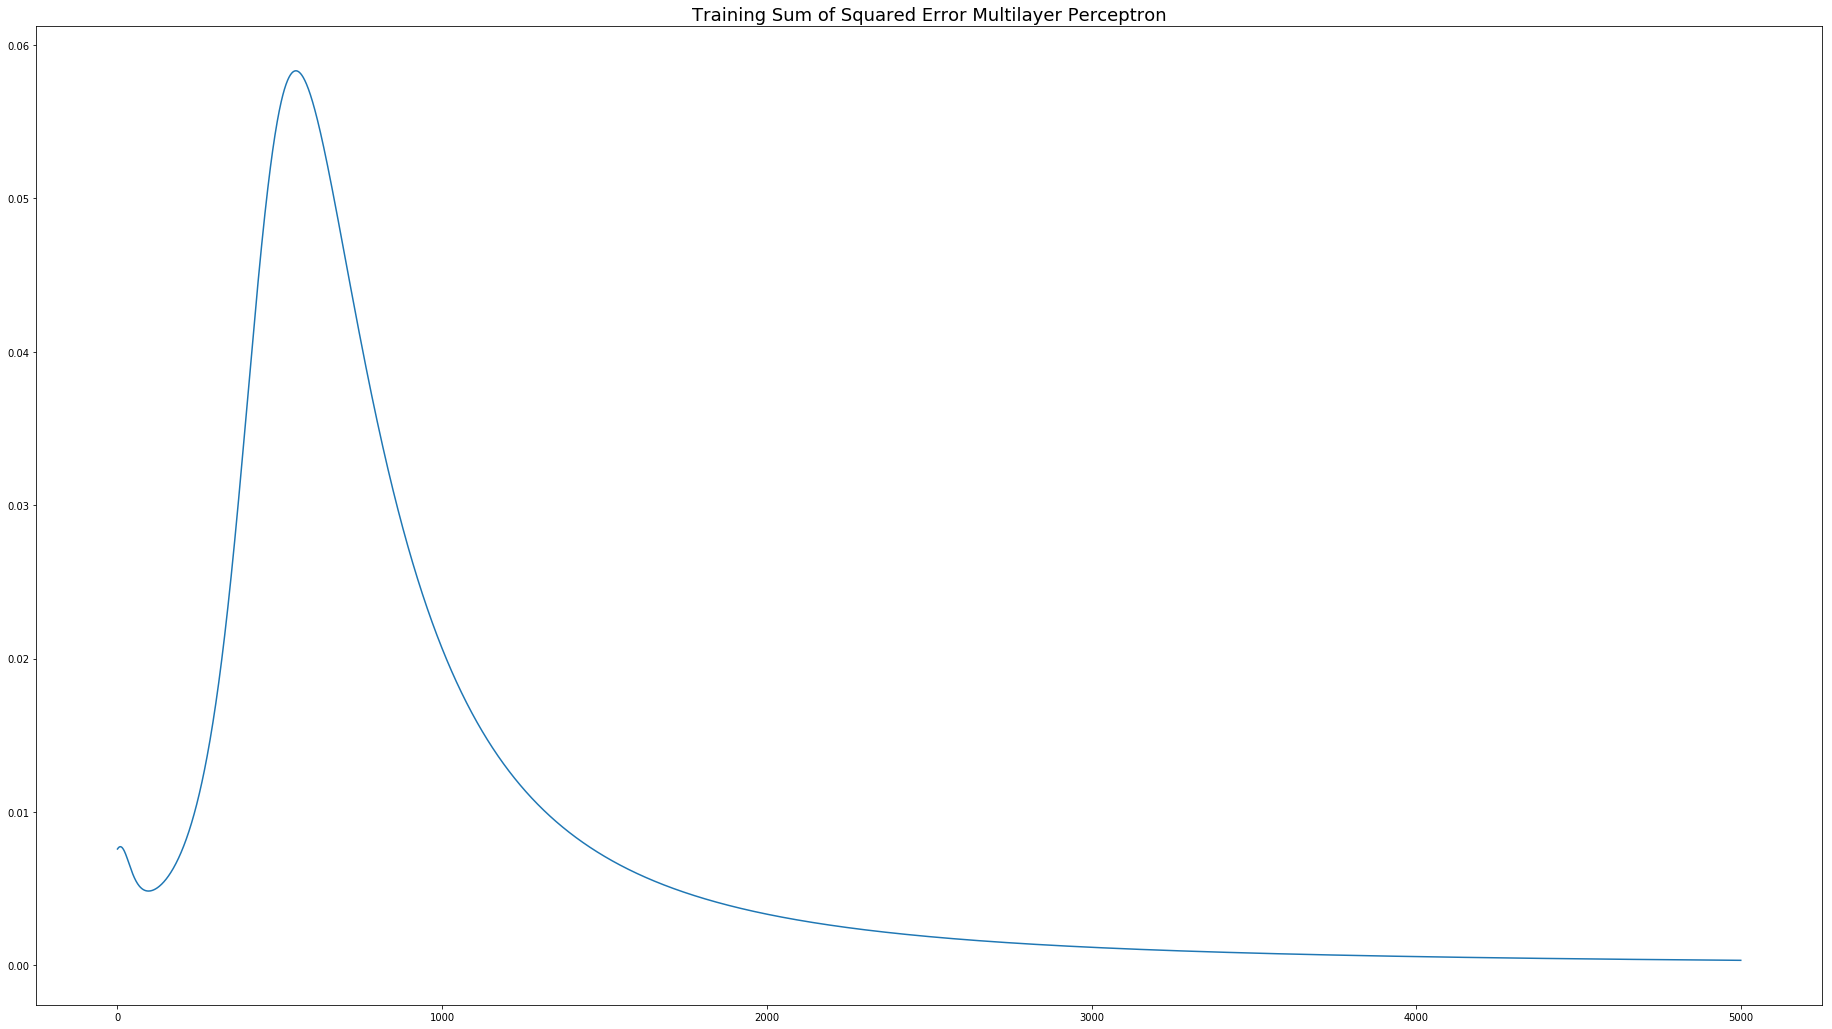

In [243]:
mlp.err_graph()

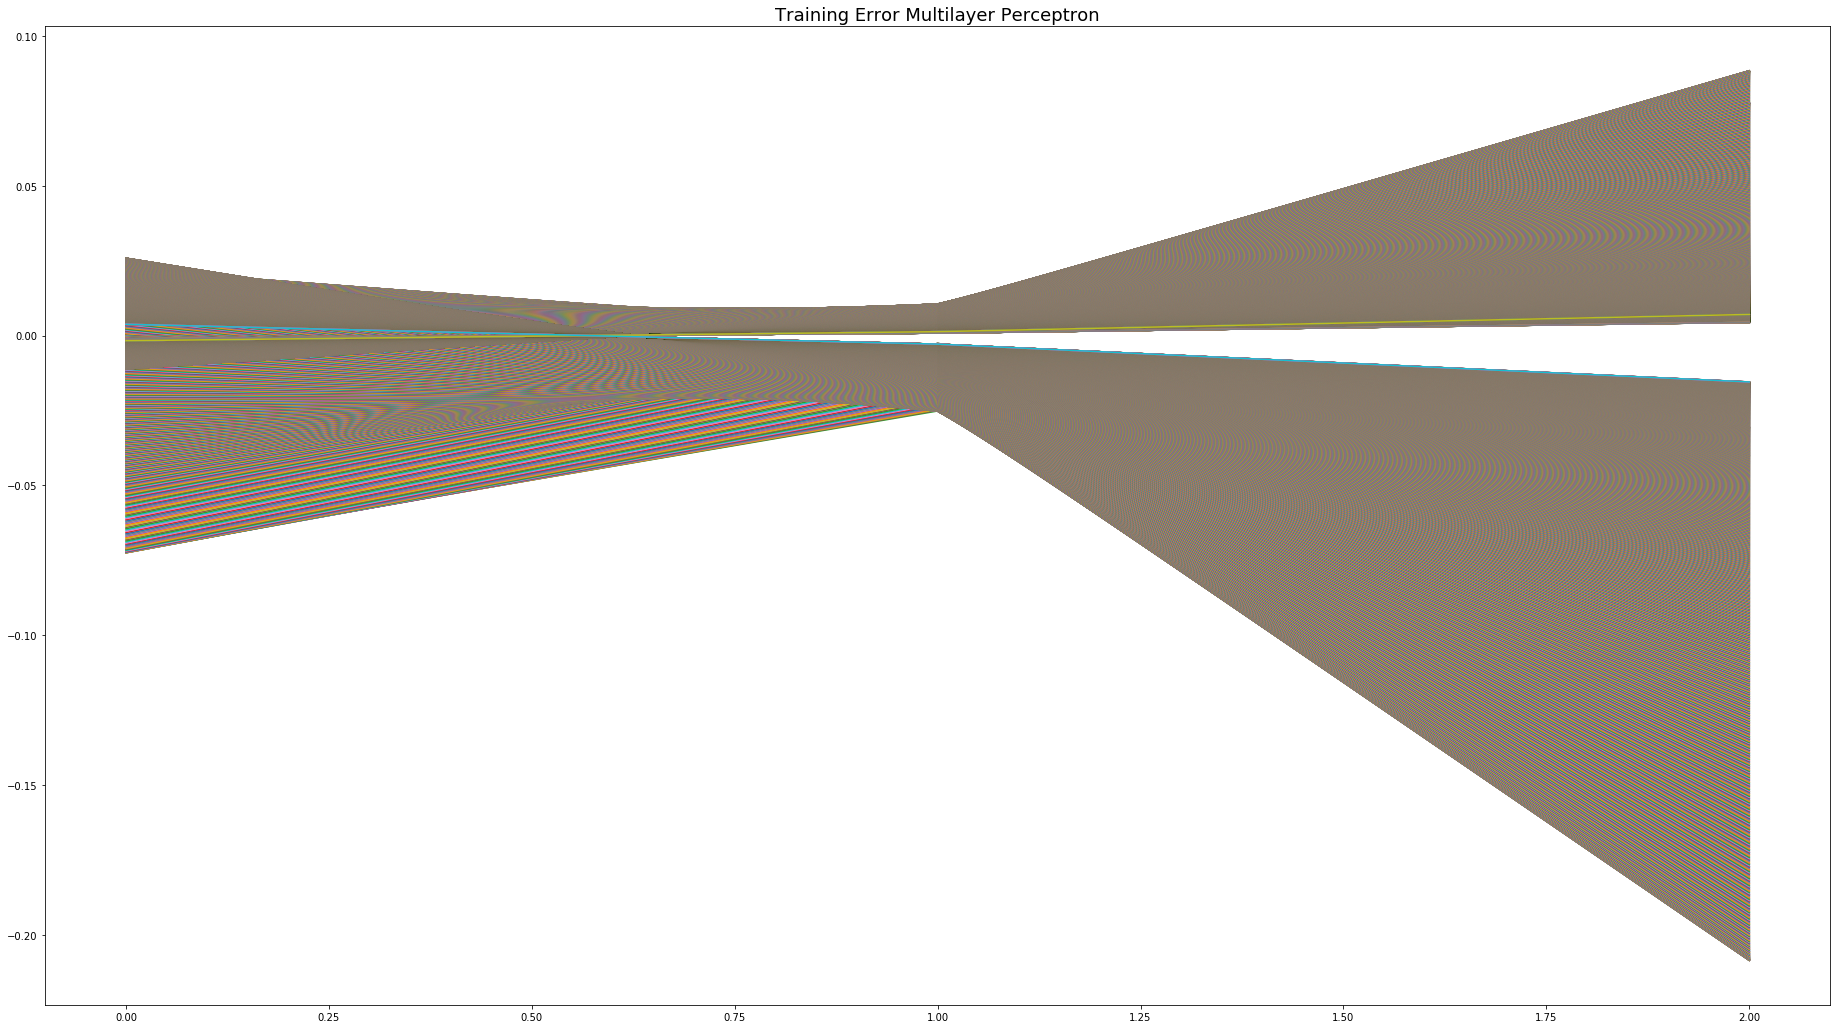

In [244]:
mlp.err_all()

In [245]:
X=np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1]])

#Output
y=np.array([[1],[1],[1]])
ml_two =  mlPerceptron(epoch=10000)


In [246]:
ml_two.train(X,y)

The final training output is: [[0.99330383]
 [0.99330383]
 [0.99330383]]
The final sum of sq error in training error is: 5.395295692025512e-07


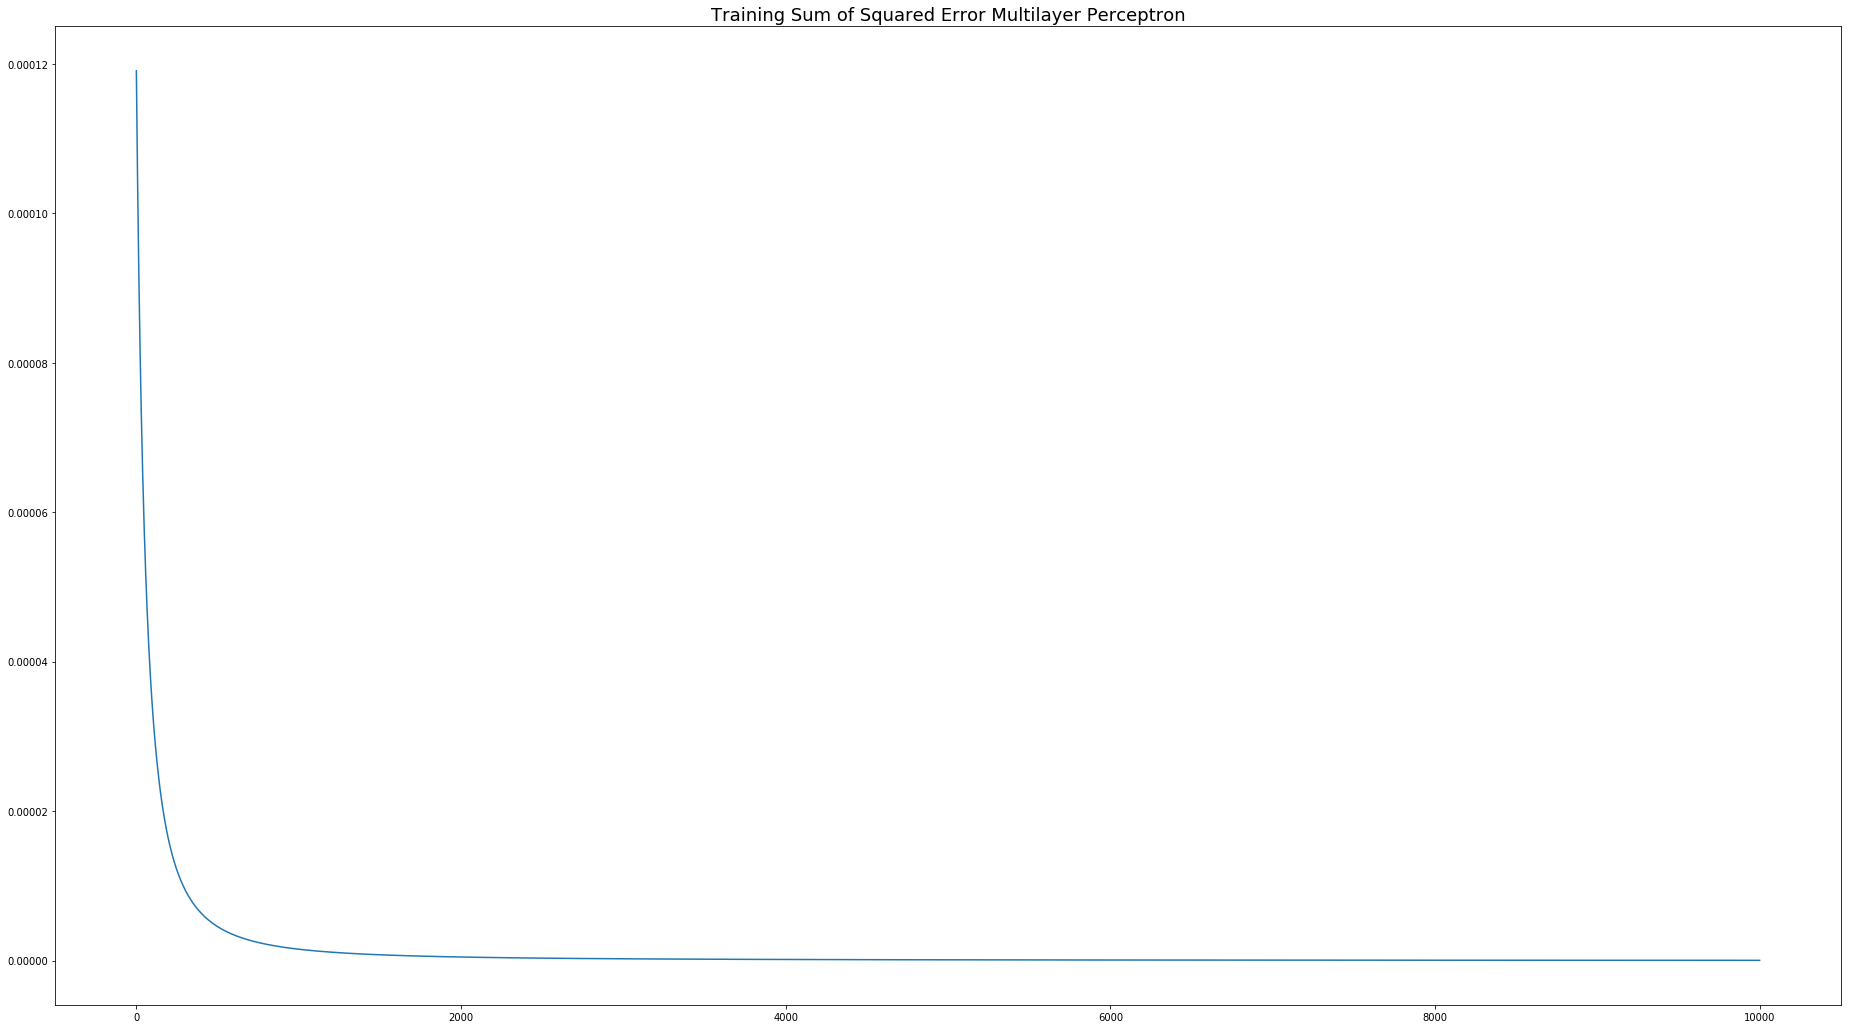

In [247]:
ml_two.err_graph()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?